In [1]:
import pandas as pd
import os

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Merging csv files

In [3]:
file=os.listdir('Sales_Data')
all_month=pd.DataFrame()
for files in file:
    df=pd.read_csv('Sales_Data/'+files)
    all_month=pd.concat([all_month,df])
all_month.to_csv("Total_data.csv",index=False)

In [4]:
data=pd.read_csv("Total_data.csv")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### clean up the data

In [5]:
na=data[data.isna().any(axis=1)]
na

data=data.dropna(how='all')
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [6]:
data=data[data['Order Date'].str[0:2]!='Or']


In [7]:
data['Quantity Ordered']=pd.to_numeric(data['Quantity Ordered'])#convert to int
data['Price Each']=pd.to_numeric(data['Price Each'])#convert to float

### Add month column

In [8]:
data['month'] = data['Order Date'].str[0:2].astype('int32')
# data['month']=data['month'].astype('int32')
data


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


### Add city column

In [9]:
def city(address):
    return address.split(',')[1]
def state(a):
    return a.split(',')[2].split(' ')[1]
data['city']=data['Purchase Address'].apply(city)+'('+data['Purchase Address'].apply(state)+')'
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston(MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles(CA)


In [10]:
data['sales']=data['Quantity Ordered']*data['Price Each']
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas(TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston(MA),99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles(CA),11.99
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles(CA),8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco(CA),700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,San Francisco(CA),700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,San Francisco(CA),379.99


### Question 1: What was the best month for sales? How much was earned that month?

In [11]:
results=data.groupby("month").sum()

Text(0, 0.5, 'Sales')

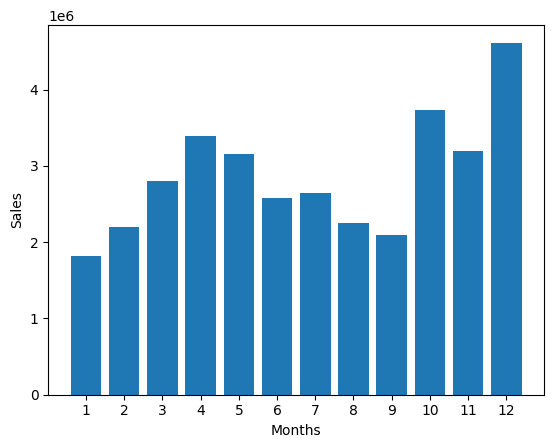

In [12]:
import matplotlib.pyplot as plt
x=range(1,13)
plt.bar(x,data.groupby("month").sum()['sales'])
plt.xticks(x)
plt.xlabel("Months")
plt.ylabel("Sales")

### Question 2: What city had the highest number of sales?

In [13]:
sal=data.groupby('city').sum()
sal

,Quantity Ordered,Price Each,month,sales
city,,,,
Atlanta(GA),16602,2779908.20,104794,2795498.58
Austin(TX),11153,1809873.61,69829,1819581.75
Boston(MA),22528,3637409.77,141112,3661642.01
Dallas(TX),16730,2752627.82,104620,2767975.40
Los Angeles(CA),33289,5421435.23,208325,5452570.80
New York City(NY),27932,4635370.83,175741,4664317.43
Portland(ME),2750,447189.25,17144,449758.27
Portland(OR),11303,1860558.22,70621,1870732.34
San Francisco(CA),50239,8211461.74,315520,8262203.91


Text(0.5, 0, 'city')

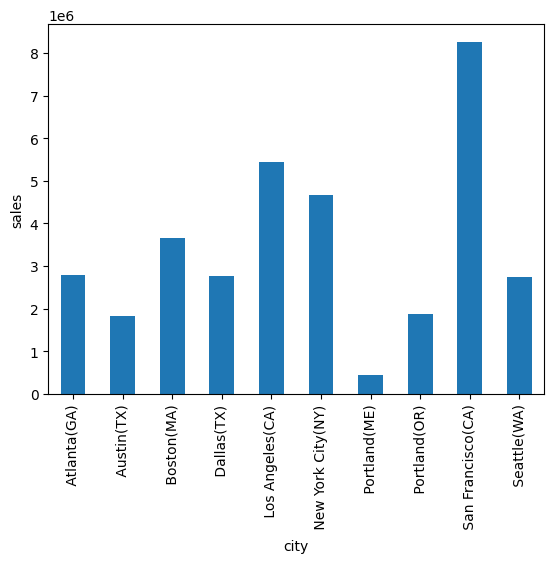

In [14]:
sal['sales'].plot(kind='bar')
plt.ylabel('sales')
plt.xlabel('city')

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [15]:
data['Order Date']=pd.to_datetime(data['Order Date'])

In [16]:
data['hour']=data['Order Date'].dt.hour
data['minutes']=data['Order Date'].dt.minute
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,sales,hour,minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas(TX),23.90,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston(MA),99.99,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA),600.00,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA),11.99,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles(CA),11.99,9,27


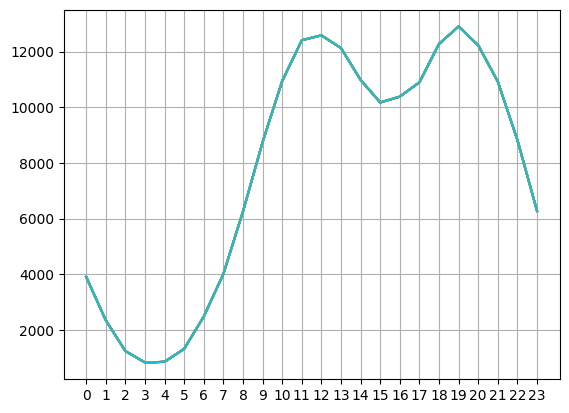

In [17]:
keys = [pair for pair, df in data.groupby(['hour'])]

plt.plot(keys,data.groupby(['hour']).count())
plt.xticks(keys)
plt.grid()
plt.show()

### Question 4: What products are most often sold together?

In [18]:
df=data[data['Order ID'].duplicated(keep=False)]
df['grouped']=df.groupby("Order ID")['Product'].transform(lambda x:','.join(x))
df=df[["Order ID","grouped"]].drop_duplicates()
df

,Order ID,grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [19]:
from itertools import combinations
from collections import Counter

count=Counter()
for i in df['grouped']:
    list=i.split(',')
    count.update(Counter(combinations(list,2)))
for key,value in count.most_common(10):
    print(key,value)
    


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### What product sold the most? Why do you think it sold the most?

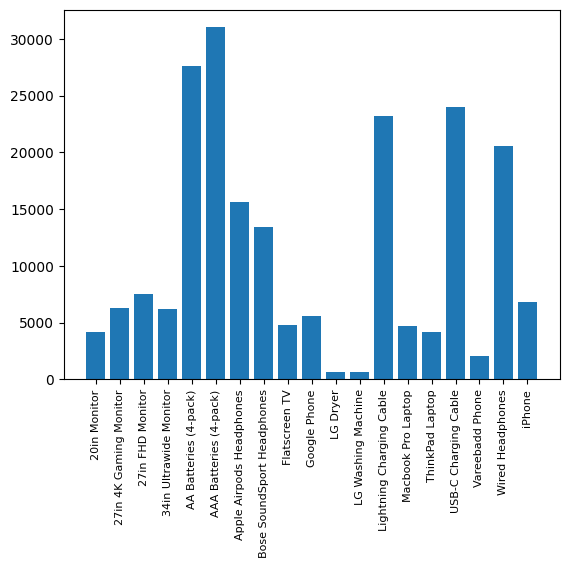

In [20]:
product_group = data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [21]:
price=data.groupby("Product")['Price Each'].mean('Price Each')

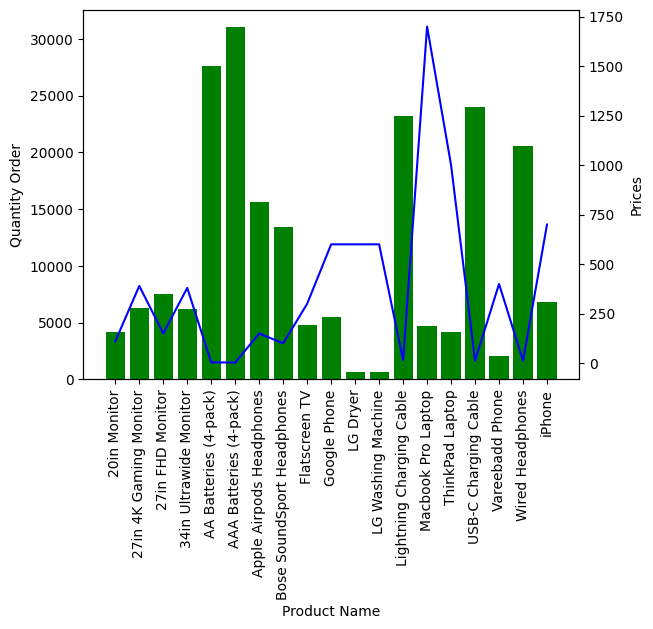

In [22]:
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(keys,quantity_ordered,color='g')
ax2.plot(keys,price,'b-')
ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Order")
ax2.set_ylabel("Prices")
ax1.set_xticklabels(keys,rotation='vertical')
plt.show()
 